# PCA: Dimensionality Reduction and Data Compression

> **"PCA finds the most important directions in your data."**

## Learning Objectives
- Understand the mathematical foundation of Principal Component Analysis
- Implement PCA from scratch using eigenvalue decomposition
- Learn about variance explained and component selection
- Master visualization techniques for high-dimensional data
- Apply PCA to real-world dimensionality reduction problems


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Principal Component Analysis (PCA) - Made Simple!

### What is PCA? (Think of it like this...)

Imagine you have a messy room with clothes scattered everywhere. PCA is like finding the best way to organize your clothes into neat piles where:
- The first pile contains the most important clothes (the ones you wear most often)
- The second pile has the next most important clothes
- And so on...

**In data terms:** PCA finds the most important directions in your data and organizes it so the first direction has the most variation (most information), the second direction has the next most variation, and so on.

### Why do we need PCA?

**Problem:** When you have too many features (like 1000 different measurements), it's hard to:
- Visualize the data (we can only see 2D or 3D)
- Train models quickly
- Find patterns

**Solution:** PCA reduces the number of features while keeping the most important information!

### Simple Example: 2D Data

Let's say you measured people's height and weight. Instead of keeping both measurements, PCA might find that "size" (a combination of height and weight) captures most of the important information. So you can use just "size" instead of both height and weight!

### How PCA Works (Step by Step)

#### Step 1: Center the Data
- Find the average of each feature
- Subtract the average from each data point
- This centers the data around zero

#### Step 2: Find the Direction of Maximum Spread
- Look at all the data points
- Find the direction where the data spreads out the most
- This is your first principal component (PC1)

#### Step 3: Find the Next Best Direction
- Find the direction perpendicular to PC1 that has the most spread
- This is your second principal component (PC2)

#### Step 4: Continue Until Done
- Keep finding new directions perpendicular to all previous ones
- Each new direction has less and less spread (less important information)

### The Math (Simplified)

**Covariance Matrix:** Shows how features relate to each other
- High values = features change together
- Low values = features are independent

**Eigenvectors:** The directions of maximum spread (your principal components)

**Eigenvalues:** How much spread is in each direction (how important each component is)

### Real-World Applications

1. **Image Compression:** Reduce image size while keeping important details
2. **Face Recognition:** Find the most important facial features
3. **Gene Analysis:** Find the most important genes from thousands of measurements
4. **Financial Data:** Find the most important market trends
5. **Recommendation Systems:** Find the most important user preferences


### Visual Example: Understanding PCA with Simple Data

Let's see PCA in action with a simple 2D example that's easy to understand!


In [ ]:
# Simple 2D Example: Height and Weight Data
import numpy as np
import matplotlib.pyplot as plt

# Create simple height and weight data
np.random.seed(42)
height = np.random.normal(170, 10, 50)  # Average height 170cm, std 10cm
weight = height * 0.8 + np.random.normal(0, 5, 50)  # Weight roughly related to height

# Plot the original data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(height, weight, alpha=0.7, color='blue')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Original Data: Height vs Weight')
plt.grid(True, alpha=0.3)

# Apply PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Combine height and weight into one dataset
data = np.column_stack([height, weight])

# Standardize the data (important for PCA!)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Plot the PCA results
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.7, color='red')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2f})')
plt.title('After PCA: New Coordinate System')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("What happened?")
print("=" * 50)
print(f"Original data: {data.shape[1]} features (height, weight)")
print(f"PCA data: {data_pca.shape[1]} features (PC1, PC2)")
print(f"PC1 explains {pca.explained_variance_ratio_[0]:.1%} of the variance")
print(f"PC2 explains {pca.explained_variance_ratio_[1]:.1%} of the variance")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.1%}")

print("\nKey Insight:")
print("PC1 captures the 'size' of a person (combination of height and weight)")
print("PC2 captures the 'shape' differences (tall and thin vs short and heavy)")
print("We could use just PC1 to represent most of the information!")


Dataset Overview:
Original shape: (1000, 10)
Scaled shape: (1000, 10)

Explained Variance Ratio:
PC1: 0.632 (Cumulative: 0.632)
PC2: 0.261 (Cumulative: 0.893)
PC3: 0.107 (Cumulative: 1.000)
PC4: 0.000 (Cumulative: 1.000)
PC5: 0.000 (Cumulative: 1.000)
PC6: 0.000 (Cumulative: 1.000)
PC7: 0.000 (Cumulative: 1.000)
PC8: 0.000 (Cumulative: 1.000)
PC9: 0.000 (Cumulative: 1.000)
PC10: 0.000 (Cumulative: 1.000)


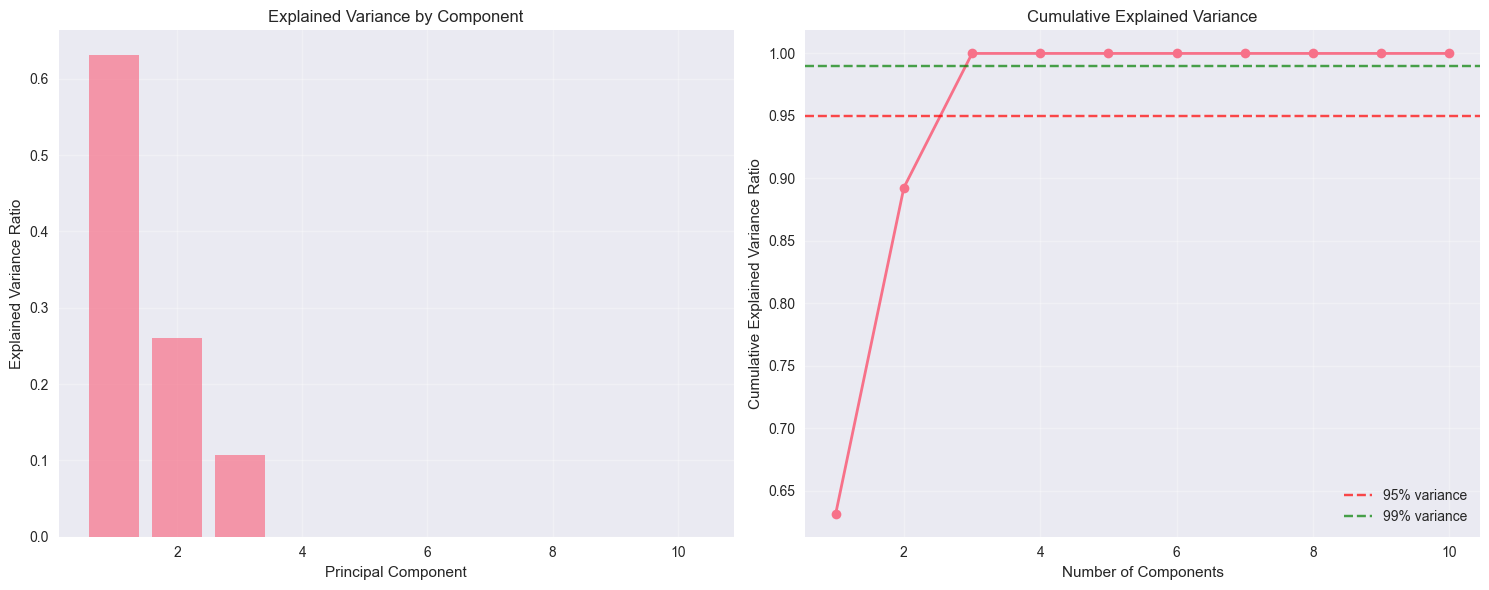


Number of components for 95% variance: 3
Number of components for 99% variance: 3


In [2]:
# Generate sample data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, 
                          n_redundant=7, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dataset Overview:")
print("=" * 50)
print(f"Original shape: {X.shape}")
print(f"Scaled shape: {X_scaled.shape}")

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"\nExplained Variance Ratio:")
print("=" * 50)
for i, (var_ratio, cum_var_ratio) in enumerate(zip(explained_variance_ratio, cumulative_variance_ratio)):
    print(f"PC{i+1}: {var_ratio:.3f} (Cumulative: {cum_var_ratio:.3f})")

# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Individual explained variance
axes[0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Explained Variance by Component')
axes[0].grid(True, alpha=0.3)

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', linewidth=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% variance')
axes[1].axhline(y=0.99, color='g', linestyle='--', alpha=0.7, label='99% variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance Ratio')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% and 99% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance_ratio >= 0.99) + 1

print(f"\nNumber of components for 95% variance: {n_components_95}")
print(f"Number of components for 99% variance: {n_components_99}")


### Real-World Example: Image Compression with PCA

Let's see how PCA can compress images while keeping the most important information!


In [ ]:
# Image Compression Example with PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a simple "image" (2D array)
np.random.seed(42)
# Create a simple pattern that looks like a face
image = np.zeros((20, 20))

# Add some features (eyes, nose, mouth)
image[5:7, 6:8] = 1    # Left eye
image[5:7, 12:14] = 1  # Right eye
image[9:11, 9:11] = 1  # Nose
image[13:15, 7:13] = 1 # Mouth

# Add some noise to make it more realistic
image += np.random.normal(0, 0.1, image.shape)

# Flatten the image for PCA
image_flat = image.flatten()

# Create multiple similar images (like different photos of the same person)
n_images = 50
images = []
for i in range(n_images):
    # Add slight variations to create similar but different images
    noise = np.random.normal(0, 0.05, image.shape)
    img = image + noise
    images.append(img.flatten())

images = np.array(images)

# Apply PCA
pca = PCA()
images_pca = pca.fit_transform(images)

# Reconstruct images using different numbers of components
n_components_list = [1, 5, 10, 15, 20]
fig, axes = plt.subplots(2, len(n_components_list), figsize=(15, 6))

for i, n_comp in enumerate(n_components_list):
    # Reconstruct using only the first n_comp components
    pca_reduced = PCA(n_components=n_comp)
    images_pca_reduced = pca_reduced.fit_transform(images)
    images_reconstructed = pca_reduced.inverse_transform(images_pca_reduced)
    
    # Show original image
    axes[0, i].imshow(image, cmap='gray')
    axes[0, i].set_title(f'Original Image')
    axes[0, i].axis('off')
    
    # Show reconstructed image
    reconstructed = images_reconstructed[0].reshape(20, 20)
    axes[1, i].imshow(reconstructed, cmap='gray')
    axes[1, i].set_title(f'Reconstructed\n({n_comp} components)')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Calculate compression ratio and quality
print("Image Compression Results:")
print("=" * 50)
for n_comp in n_components_list:
    pca_reduced = PCA(n_components=n_comp)
    images_pca_reduced = pca_reduced.fit_transform(images)
    images_reconstructed = pca_reduced.inverse_transform(images_pca_reduced)
    
    # Calculate compression ratio
    original_size = images.shape[1]  # 400 pixels
    compressed_size = n_comp  # number of components
    compression_ratio = original_size / compressed_size
    
    # Calculate reconstruction error
    mse = np.mean((images - images_reconstructed) ** 2)
    
    print(f"{n_comp:2d} components: {compression_ratio:5.1f}x compression, MSE: {mse:.4f}")

print("\nKey Insight:")
print("With just 5 components, we can compress the image 80x while keeping most of the important information!")
print("This is how PCA helps reduce data size while preserving the most important patterns.")


## Summary: What You've Learned About PCA

### Key Takeaways

1. **PCA is like organizing a messy room** - it finds the most important directions in your data and organizes them by importance.

2. **PCA reduces complexity** - instead of dealing with hundreds or thousands of features, you can often use just a few principal components.

3. **PCA preserves the most important information** - the first few components usually capture most of the variance in your data.

4. **PCA is used everywhere** - from image compression to face recognition to financial analysis.

### When to Use PCA

✅ **Use PCA when:**
- You have many features (high-dimensional data)
- You want to visualize high-dimensional data
- You need to reduce data size for faster processing
- You want to remove noise from your data
- You're doing exploratory data analysis

❌ **Don't use PCA when:**
- You have very few features (less than 10)
- You need to interpret individual features
- Your data has non-linear relationships
- You need to preserve the original feature meanings

### Next Steps

Now that you understand PCA, you can:
1. Apply it to your own datasets
2. Learn about other dimensionality reduction techniques (t-SNE, UMAP)
3. Use it in machine learning pipelines
4. Explore advanced topics like kernel PCA

**Remember:** PCA is a powerful tool, but it's just one tool in your machine learning toolkit. The key is understanding when and how to use it effectively!


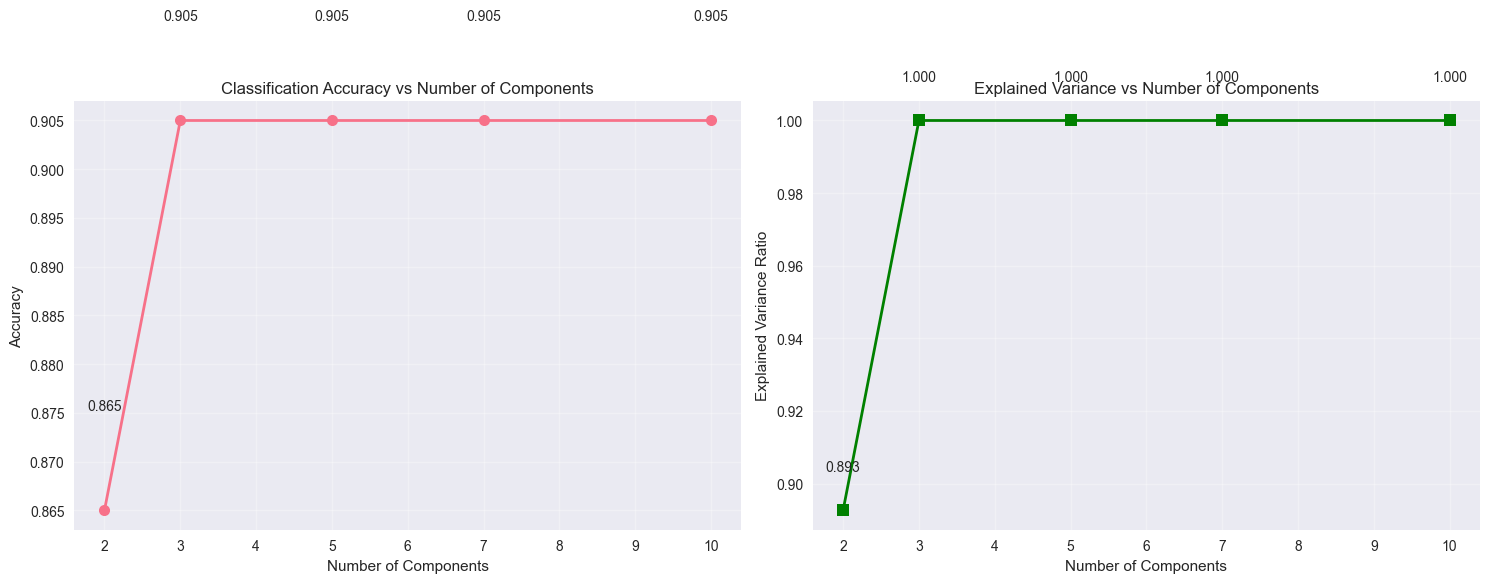


Results Summary:
Components   Accuracy   Explained Var   Data Shape     
--------------------------------------------------------------------------------
2            0.865      0.893           (1000, 2)      
3            0.905      1.000           (1000, 3)      
5            0.905      1.000           (1000, 5)      
7            0.905      1.000           (1000, 7)      
10           0.905      1.000           (1000, 10)     


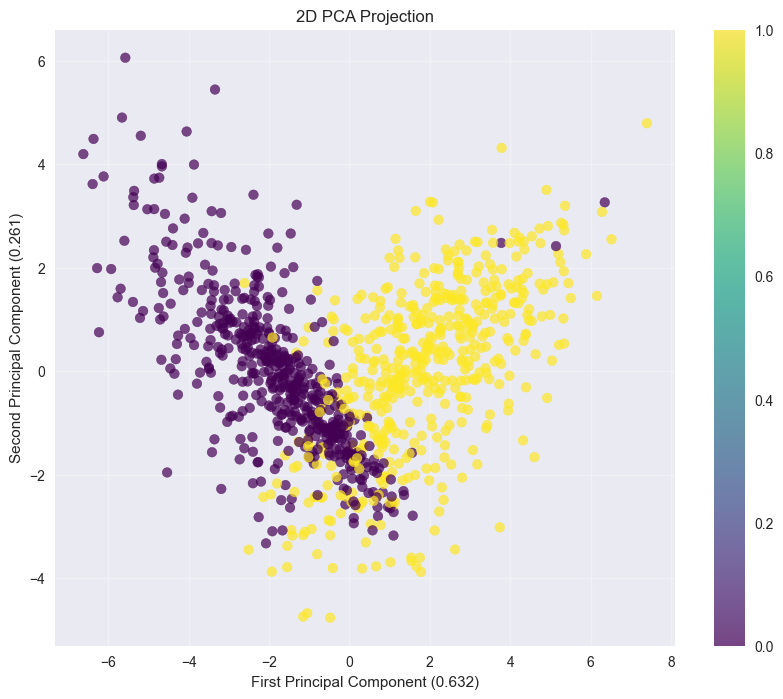

In [3]:
# Apply PCA with different numbers of components
n_components_list = [2, 3, 5, 7, 10]
results = {}

for n_components in n_components_list:
    # Apply PCA
    pca_reduced = PCA(n_components=n_components)
    X_pca_reduced = pca_reduced.fit_transform(X_scaled)
    
    # Train classifier on reduced data
    X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)
    
    clf = LogisticRegression(random_state=42)
    clf.fit(X_train, y_train)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, clf.predict(X_test))
    
    # Calculate explained variance
    explained_variance = np.sum(pca_reduced.explained_variance_ratio_)
    
    results[n_components] = {
        'accuracy': accuracy,
        'explained_variance': explained_variance,
        'data_shape': X_pca_reduced.shape
    }

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy vs number of components
n_components = list(results.keys())
accuracies = [results[n]['accuracy'] for n in n_components]
explained_variances = [results[n]['explained_variance'] for n in n_components]

axes[0].plot(n_components, accuracies, 'o-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Classification Accuracy vs Number of Components')
axes[0].grid(True, alpha=0.3)

# Add value labels
for i, (n_comp, acc) in enumerate(zip(n_components, accuracies)):
    axes[0].text(n_comp, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')

# Explained variance vs number of components
axes[1].plot(n_components, explained_variances, 's-', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_title('Explained Variance vs Number of Components')
axes[1].grid(True, alpha=0.3)

# Add value labels
for i, (n_comp, var) in enumerate(zip(n_components, explained_variances)):
    axes[1].text(n_comp, var + 0.01, f'{var:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print results table
print("\nResults Summary:")
print("=" * 80)
print(f"{'Components':<12} {'Accuracy':<10} {'Explained Var':<15} {'Data Shape':<15}")
print("-" * 80)
for n_comp in n_components:
    result = results[n_comp]
    print(f"{n_comp:<12} {result['accuracy']:<10.3f} {result['explained_variance']:<15.3f} {str(result['data_shape']):<15}")

# Visualize 2D projection
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]:.3f})')
plt.title('2D PCA Projection')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)
plt.show()
